<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-algaher0805/blob/main/curso2_m%C3%B3dulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis with Python, IBM.

##Módulo 2

###Alejandro García Hernández

###A01793812

En el módulo 2 se introduce el término Pre-procesamiento de datos que básicamente se refiere a la limpieza de los datos.

##Missing values
Nos referimos a missing value cuando, para alguna observación en particular, no se almacenó ningún valor para alguna característica. Generalmente, estos valores aparecen como “?”, “N/A”, 0 como celdas vacías.

Existen diferentes maneras para lidiar con la información faltante:

* Intentar obtener la información faltante de la fuente original.
* Eliminar los renglones en donde exista información de alguna de sus columnas (características), o incluso, si en alguna de las características la mayoría de la información está vacía, podríamos optar por eliminar la columna completa.
* Imputar los datos faltantes. Si bien con esta opción no se pierde información del resto de las columnas, también estamos agregando información estimada a nuestra base de datos.
 * Para variables númericas, se puede sustituir los valores faltantes por el promedio de la columna completa.
 * Para variables categoricas, se puede sustituir los valores faltantes por la moda de la columna completa.
 * También podemos sustituir las variables vacías con base en algún otro criterio, por ejemplo haciendo validaciones cruzadas con otras características.


 





In [139]:
#Pandas tiene funciones útiles para eliminar o para reemplazar valores faltantes
import pandas as pd
import numpy as np
archivo = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
nombres = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(archivo, names = nombres)
df.head()
#aquí se observa que al menos normalized-losses tiene valores faltantes

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [140]:
#Podemos observar que los valores faltantes de este archivo están representados por "?", por lo que primero reemplazamos este valor por NaN (con la función nan de numpy)
#y después vemos cuales campos contienen valores faltantes

df.replace('?', np.nan, inplace = True)
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [141]:
#Se observa que normalized-losses contiene 41 missing, así que sustituimos ahora los valores faltantas
#primero, aunque con la función head se observa que ese campo tiene valores numericos, al obtener el tipo de datos de los campos
#se observa que este campo se cargo como tipo objeto por lo que al calcular la media tendremos que convertirlo a float
print(df.dtypes)
prom_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("los valores faltantes de normalized-losses se sustituira por el valor de la media:", prom_norm_loss)
df["normalized-losses"].replace(np.nan, prom_norm_loss, inplace = True)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
los valores faltantes de normalized-losses se sustituira por el valor de la media: 122.0


In [142]:
#corroboramos que efectivamente ya no haya valores faltantes en normalized-losses
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [143]:
#otra función útil de pandas es dropna, aquí vamos a eliminar los 4 renglones completos cuyo valor de bore es missing
df.dropna(subset=["bore"], axis=0, inplace=True)
#corroboramos que efectivamente se hayan eliminado estos renglones
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

Otro punto que se trata en este módulo es el formato de datos. Esto es relevante ya que para poder llevar a cabo el análisis de información primero debemos asegurarnos de que los datos estén en el mismo formato, mismas unidades, etc. Por ejemplo, puede que algunos de los datos estén en cm y nosotros necesitemos la medida en metros, o que al importar los datos estos se hayan importado con algún tipo inadecuado como en nuestro caso, algunas variables que deben de ser numericas fueron importadas como texto (object). 

In [144]:
#para cambiar el tipo de datos de una variable utilizamos la función astype()
df['normalized-losses'] = df['normalized-losses'].astype('float')
#si checamos de nuevo el tipo de datos de normalized-losses vemso que ahora ya es float
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Otro punto importante en el pre-procesamiento de los datos es la normalización, es importante que los datos estén acotados en rangos comparables ya que si alguna de las caracteristicas tiene mediciones mucho mayores que el resto puede que los algoritmos le den un peso mayor a esta variable simplemente por tener una escala mucho mayor que el resto. Otra ventaja de la normalización es que se las variables pueden ser comparadas de mejor forma sin importar las unidades ya que puede que algunas estén medidas en metros, otras en litros, otra en unidades monetarias, etc. Algunos métodos de normalización son:
  * Escalamiento. Por ejemplo, dividir todos los valores entre el valor máximo
   * Escalamiento simple
   * Min-Max
   * Z-score

In [145]:
#primero vemos cuales son los valores máximo y mínimo de la variable price. Este método se conoce como escalamiento simple
df['price'] = df['price'].astype('float')
max = df["price"].max()
min = df["price"].min()
print("El valor máximo de los datos originales es",max)
print("El valor mínimo de los datos originales es",min)
#y volvemos a obtener estos valores al escalarlas
df['escalada'] = df['price'] / max
print("El valor máximo de los datos escalados es",df["escalada"].max())
print("El valor mínimo de los datos escalados es",round(df["escalada"].min(),3))

El valor máximo de los datos originales es 45400.0
El valor mínimo de los datos originales es 5118.0
El valor máximo de los datos escalados es 1.0
El valor mínimo de los datos escalados es 0.113


In [146]:
#como vemos, en este método el valor máximo de los datos escalados siempre será 1 pero el valor mínimo variará,
#El siguiente método escala los datos dentro del rango [0,1], a este método se le conoce como min-max
df['escalada2'] = (df['price'] - min) / (max - min)
print("El valor máximo de los datos escalados es",df["escalada2"].max())
print("El valor mínimo de los datos escalados es",df["escalada2"].min())

El valor máximo de los datos escalados es 1.0
El valor mínimo de los datos escalados es 0.0


In [147]:
#Finalmente el método Z-score tiene la ventaja que los datos tendrán una distribución normal con media 0 desviación 1.
df['escalada3'] = (df['price'] - df['price'].mean()) / df['price'].std()
print("La media de los datos escalados es",abs(round(df["escalada3"].mean(),10)))
print("La desviación estándar de los datos escalados es",df["escalada3"].std())

La media de los datos escalados es 0.0
La desviación estándar de los datos escalados es 1.0


  * Binning. Podemos agrupar las variables numericas en intervalos con lo que se reduce el número de valores únicos y se aumenta la frecuencia.

In [148]:
#Numpy contiene una función para crear intervalos de identico tamaño
df.dropna(subset= ['horsepower'], axis=0,inplace = True)
df['horsepower'] = df['horsepower'].astype('int')
lista = df.horsepower.unique()
#podemos ver que la variable horspower contiene 58 diferentes valores
print(lista.shape)
df['horsepower'].value_counts()
#de los cuales la mayoría tienen una frecuencia baja 

(58,)


68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
160     6
114     6
84      5
102     5
145     5
76      5
97      5
82      5
123     4
86      4
92      4
111     4
207     3
73      3
152     3
90      3
85      3
182     3
121     3
101     3
56      2
112     2
94      2
161     2
52      2
162     2
156     2
155     2
176     2
184     2
100     2
55      1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
262     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [149]:
#creamos 3 ranggos, en la función ponemos 4 como argumento ya que necesitamos el número inferior del primer rango 
grupos = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 4)
print("los rangos se crearan a partir de los siguientes números", grupos)
grupos_nombres = ['bajo', 'medio', 'alto']
#con la función cut de pandas creamos una nueva variable que cambiará los valores a su rango correspondiente
df['horsepower-rangos'] = pd.cut(df['horsepower'], grupos, labels=grupos_nombres, include_lowest=True )
#Imprimimos la variable original y la variable con los tangos para ver la diferencia
df[['horsepower','horsepower-rangos']].head(10)

los rangos se crearan a partir de los siguientes números [ 48. 128. 208. 288.]


,horsepower,horsepower-rangos
0,111,bajo
1,111,bajo
2,154,medio
3,102,bajo
4,115,bajo
5,110,bajo
6,110,bajo
7,110,bajo
8,140,medio
9,160,medio


  * Convertir variables categoricas a numericas. Podemos crear variables dummy para cinvertir variables categoricas en numericas. Este metodo se como ce como "one-hot encoding”. Este metodo genera una variable dummy por cada valor distinto que contenga la variable y cuando la variable toma este valor en los datos originales, su variable dummy toma el valor de 1 y 0 en otro caso.

In [152]:
#Con la función get_dummies de pandas es muy fácil generar estas variables 
#se crean las variables dummy y se les cambia el nombre
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

# unimos los data frame "df" y "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)
df[["fuel-type",'fuel-type-gas','fuel-type-diesel']].head(10)

,fuel-type,fuel-type-gas,fuel-type-gas,fuel-type-diesel,fuel-type-diesel
0,gas,1,1,0,0
1,gas,1,1,0,0
2,gas,1,1,0,0
3,gas,1,1,0,0
4,gas,1,1,0,0
5,gas,1,1,0,0
6,gas,1,1,0,0
7,gas,1,1,0,0
8,gas,1,1,0,0
9,gas,1,1,0,0


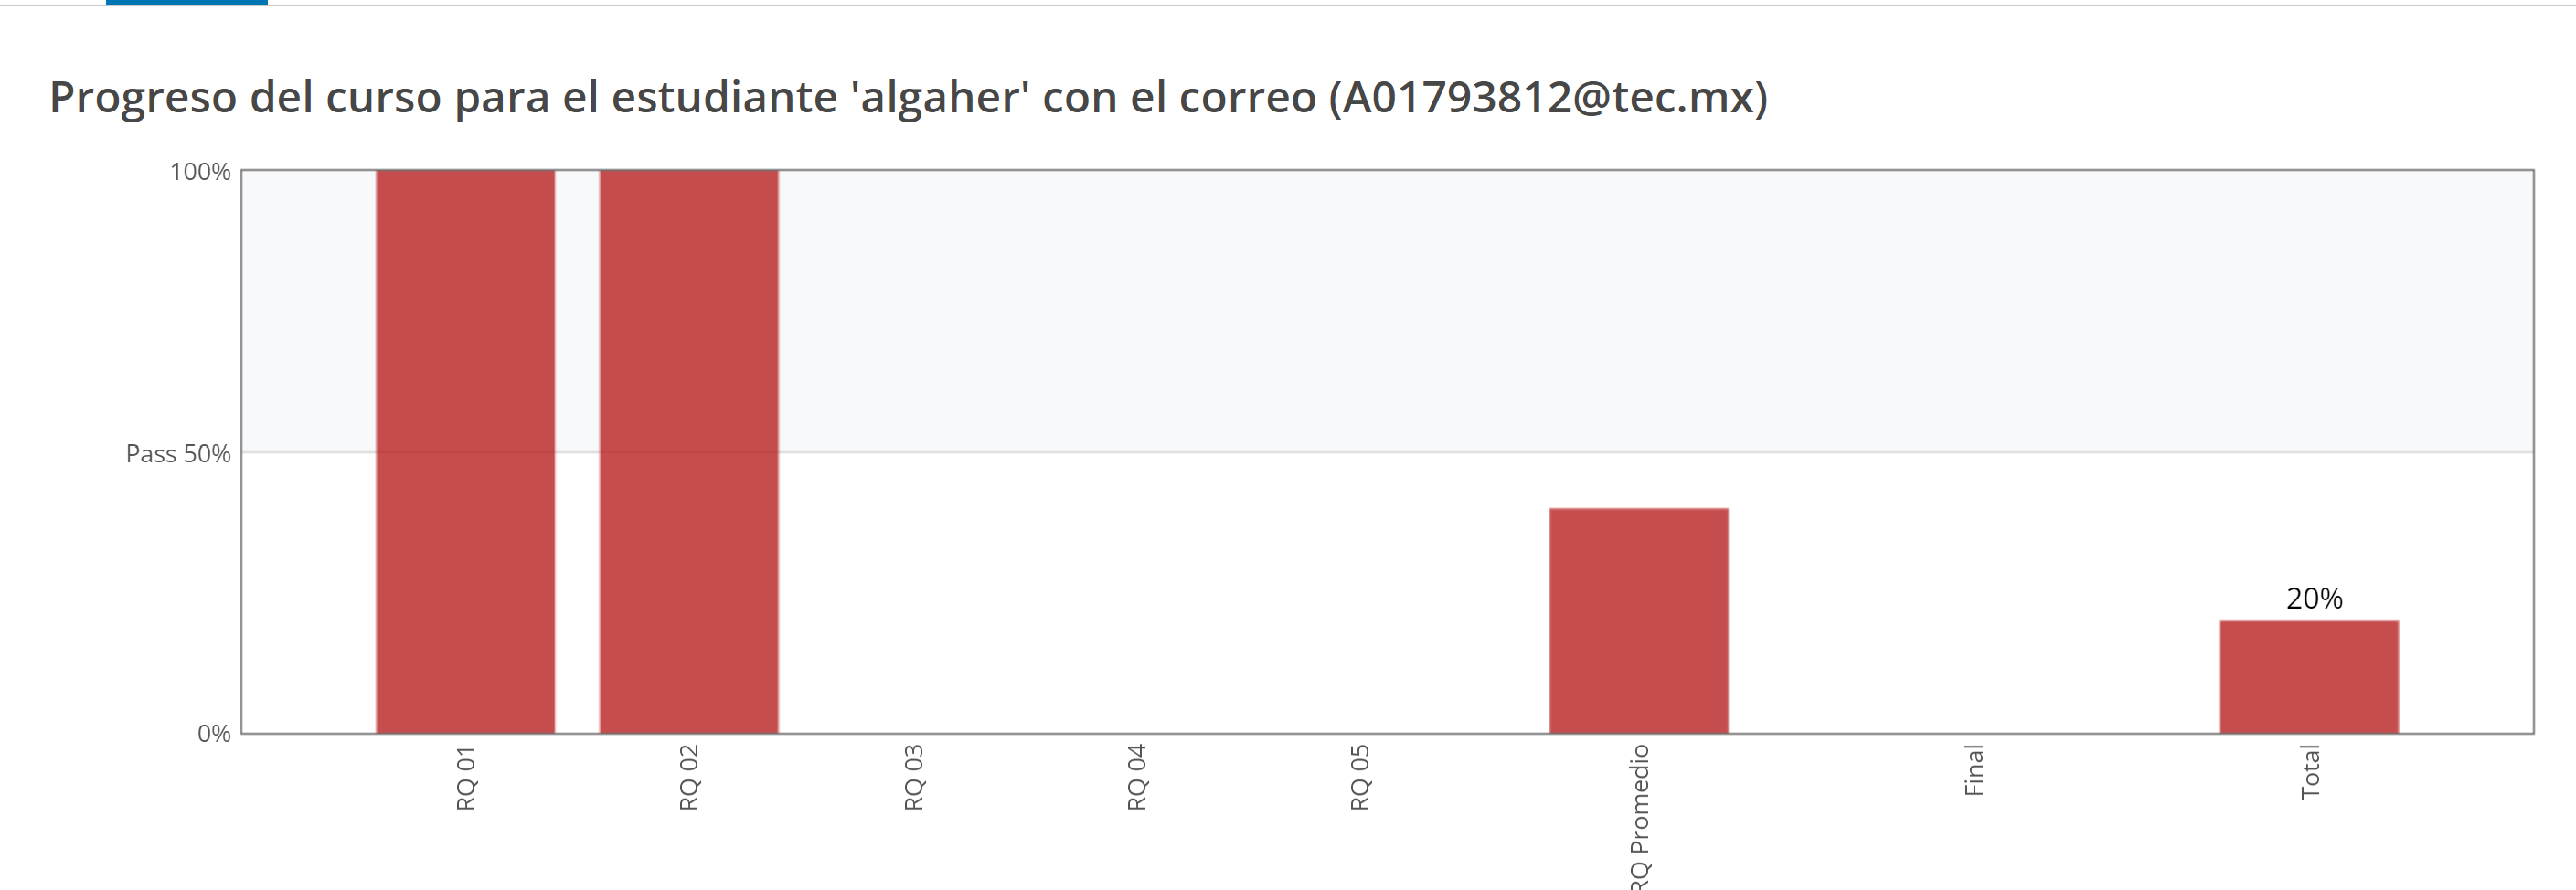